In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import random

In [2]:
khalil_meters = ['الطويل', 'المديد', 'البسيط', 'الكامل', 'الوافر', 'الهزج', 'الرجز', 'الرمل', 'السريع', 'المنسرح', 'المضارع', "الخفيف" ,'المقتضب', 'المجتث', 'المتقارب', 'الخبب']

In [3]:
from utils import reshape_text

In [4]:
from datasets import load_dataset

ashaar = load_dataset("arbml/ashaar")

In [5]:
print(ashaar.keys())

dict_keys(['train'])


In [6]:
df_ashaar = ashaar['train'].to_pandas()
df_ashaar.head()

,poem title,poem meter,poem verses,poem theme,poem url,poet name,poet description,poet url,poet era,poet location,poem description,poem language type
0,أصبح الملك للذي فطر الخلق,بحر الخفيف,"[أَصبَحَ المُلك لِلَّذي فَطر الخَل, قَ بِتَقدي...",قصيدة دينية,https://www.aldiwan.net/poem16182.html,الامير منجك باشا,منجك بن محمد بن منجك بن ابي بكر بن عبد القادر ...,https://www.aldiwan.net/cat-poet-alamir-mnczyk...,العصر العثماني,None,None,None
1,من أي مولى ارتجي,بحر مجزوء الرمل,"[مِن أَي مَولى اِرتَجي, وَلاي باب التَجي, وَال...",قصيدة دينية,https://www.aldiwan.net/poem16183.html,الامير منجك باشا,منجك بن محمد بن منجك بن ابي بكر بن عبد القادر ...,https://www.aldiwan.net/cat-poet-alamir-mnczyk...,العصر العثماني,None,None,None
2,العبد عبدك يا من أنت سيده,بحر البسيط,"[العَبد عَبدك يا مَن أَنتَ سَيدهُ, وَلَيسَ غَي...",قصيدة ذم,https://www.aldiwan.net/poem16184.html,الامير منجك باشا,منجك بن محمد بن منجك بن ابي بكر بن عبد القادر ...,https://www.aldiwan.net/cat-poet-alamir-mnczyk...,العصر العثماني,None,None,None
3,لو كنت أطمع بالمنام توهما,بحر الكامل,"[لَو كُنتَ أَطمَع بِالمَنام تَوهما, لَسالَت طَ...",قصيدة عامه,https://www.aldiwan.net/poem16185.html,الامير منجك باشا,منجك بن محمد بن منجك بن ابي بكر بن عبد القادر ...,https://www.aldiwan.net/cat-poet-alamir-mnczyk...,العصر العثماني,None,None,None
4,يعد علي أنفاسي ذنوبا,بحر الوافر,"[يعد عَليَّ أَنفاسي ذُنوباً, إِذا ما قُلت أَفد...",قصيدة عامه,https://www.aldiwan.net/poem16186.html,الامير منجك باشا,منجك بن محمد بن منجك بن ابي بكر بن عبد القادر ...,https://www.aldiwan.net/cat-poet-alamir-mnczyk...,العصر العثماني,None,None,None


In [7]:
df_ashaar.info

<bound method DataFrame.info of                        poem title       poem meter  \
0       أصبح الملك للذي فطر الخلق       بحر الخفيف   
1                من أي مولى ارتجي  بحر مجزوء الرمل   
2       العبد عبدك يا من أنت سيده       بحر البسيط   
3       لو كنت أطمع بالمنام توهما       بحر الكامل   
4            يعد علي أنفاسي ذنوبا       بحر الوافر   
...                           ...              ...   
254625                       None          المضارع   
254626                       None          المضارع   
254627                       None          المضارع   
254628                       None          المضارع   
254629                       None          المضارع   

                                              poem verses   poem theme  \
0       [أَصبَحَ المُلك لِلَّذي فَطر الخَل, قَ بِتَقدي...  قصيدة دينية   
1       [مِن أَي مَولى اِرتَجي, وَلاي باب التَجي, وَال...  قصيدة دينية   
2       [العَبد عَبدك يا مَن أَنتَ سَيدهُ, وَلَيسَ غَي...     قصيدة ذم   
3       [لَو كُنتَ أَطم

In [8]:
df_ashaar = df_ashaar[['poem verses','poem meter']]

### EXAMPLES FOR METERS

In [9]:
import json

In [10]:
df_ashaar.head()

,poem verses,poem meter
0,"[أَصبَحَ المُلك لِلَّذي فَطر الخَل, قَ بِتَقدي...",بحر الخفيف
1,"[مِن أَي مَولى اِرتَجي, وَلاي باب التَجي, وَال...",بحر مجزوء الرمل
2,"[العَبد عَبدك يا مَن أَنتَ سَيدهُ, وَلَيسَ غَي...",بحر البسيط
3,"[لَو كُنتَ أَطمَع بِالمَنام تَوهما, لَسالَت طَ...",بحر الكامل
4,"[يعد عَليَّ أَنفاسي ذُنوباً, إِذا ما قُلت أَفد...",بحر الوافر


In [11]:
df_ashaar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254630 entries, 0 to 254629
Data columns (total 2 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   poem verses  254630 non-null  object
 1   poem meter   153353 non-null  object
dtypes: object(2)
memory usage: 3.9+ MB


In [12]:
def poem_to_verses(poem):
    return [' '.join(poem[i:i+2]) for i in range(0,len(poem),2)]

p=  df_ashaar.head(1)
p.head()
poem_to_verses(p['poem verses'].to_list()[0])
# p['poem verses'].to_list()[0]

['أَصبَحَ المُلك لِلَّذي فَطر الخَل قَ بِتَقديرٍ للعَزيز العَليمِ',
 'غافر الذَنب للمسيءِ بِعَفوٍ قابل التَوب ذي العَطاء العَميمِ',
 'مُرسل المُصطَفى البَشير إِلَينا رَحمة مِنهُ بِالكَلام القَديمِ',
 'رَبَنا رَبّنا إِلَيكَ أَنينا فَأَجرنا مِن حَر نار الجَحيمِ',
 'وَاكفِنا شَرّ ما نَخاف بِلُطفٍ يا عَظيماً يَرجى لِكُل عَظيمِ',
 'وَتَقبل أَعمالَنا وَاعفُ عَنا وَأَنلنا دُخول دار النَعيمِ',
 'بِنَبي بَعثَتهُ فَهَدانا لِصِراط مِن الهُدى مُستَقيمِ',
 'وَبِمَن نَحنُ في حِماهُ مَدى الدَهر أَخيهِ يَحيى الحصور الكَريمِ',
 'أَدرك أَدرك قَوماً أَتوا بافتقار وَاِنكِسار وَمَدمَع مَسجومِ',
 'شَهدت أَرواحَهُم أَنكَ اللَهُ وَجاءوا بِكُل قَلبٍ سَليم']

In [13]:
df_ashaar['single verses'] = df_ashaar['poem verses'].apply(poem_to_verses)

C:\Users\abdul\AppData\Local\Temp\ipykernel_4884\2729166800.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ashaar['single verses'] = df_ashaar['poem verses'].apply(poem_to_verses)


In [14]:
df_ashaar = df_ashaar.explode('single verses')

In [15]:
df_ashaar.head()

,poem verses,poem meter,single verses
0,"[أَصبَحَ المُلك لِلَّذي فَطر الخَل, قَ بِتَقدي...",بحر الخفيف,أَصبَحَ المُلك لِلَّذي فَطر الخَل قَ بِتَقديرٍ...
0,"[أَصبَحَ المُلك لِلَّذي فَطر الخَل, قَ بِتَقدي...",بحر الخفيف,غافر الذَنب للمسيءِ بِعَفوٍ قابل التَوب ذي الع...
0,"[أَصبَحَ المُلك لِلَّذي فَطر الخَل, قَ بِتَقدي...",بحر الخفيف,مُرسل المُصطَفى البَشير إِلَينا رَحمة مِنهُ بِ...
0,"[أَصبَحَ المُلك لِلَّذي فَطر الخَل, قَ بِتَقدي...",بحر الخفيف,رَبَنا رَبّنا إِلَيكَ أَنينا فَأَجرنا مِن حَر ...
0,"[أَصبَحَ المُلك لِلَّذي فَطر الخَل, قَ بِتَقدي...",بحر الخفيف,وَاكفِنا شَرّ ما نَخاف بِلُطفٍ يا عَظيماً يَرج...


In [16]:
df_ashaar = df_ashaar[['single verses','poem meter']]

In [17]:
df_ashaar.head()

,single verses,poem meter
0,أَصبَحَ المُلك لِلَّذي فَطر الخَل قَ بِتَقديرٍ...,بحر الخفيف
0,غافر الذَنب للمسيءِ بِعَفوٍ قابل التَوب ذي الع...,بحر الخفيف
0,مُرسل المُصطَفى البَشير إِلَينا رَحمة مِنهُ بِ...,بحر الخفيف
0,رَبَنا رَبّنا إِلَيكَ أَنينا فَأَجرنا مِن حَر ...,بحر الخفيف
0,وَاكفِنا شَرّ ما نَخاف بِلُطفٍ يا عَظيماً يَرج...,بحر الخفيف


In [18]:
df_ashaar.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3869619 entries, 0 to 254629
Data columns (total 2 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   single verses  object
 1   poem meter     object
dtypes: object(2)
memory usage: 88.6+ MB


In [19]:
meters = df_ashaar['poem meter'].unique()

In [20]:
print(meters)

['بحر الخفيف' 'بحر مجزوء الرمل' 'بحر البسيط' 'بحر الكامل' 'بحر الوافر'
 'بحر الطويل' 'بحر السريع' 'بحر المنسرح' 'بحر مجزوء الكامل' 'بحر المجتث'
 'بحر الرمل' 'بحر مجزوء الوافر' 'بحر المتقارب' 'بحر مخلع البسيط'
 'بحر مجزوء الرجز' 'بحر مجزوء الخفيف' 'بحر الدوبيت' None 'بحر الرجز'
 'بحر المديد' 'بحر الهزج' 'بحر مجزوء البسيط' 'نثريه' 'عموديه'
 'بحر المواليا' 'بحر موشح' 'بحر مربع البسيط' 'بحر السلسلة'
 'بحر منهوك المنسرح' 'بحر تفعيلة المتقارب' 'بحر الكامل المقطوع'
 'بحر تفعيلة الرمل' 'بحر المتدارك المنهوك' 'بحر تفعيلة الرجز'
 'بحر تفعيلة الكامل' 'بحر المتدارك' 'بحر أحذ الكامل' 'بحر مشطور الرجز'
 'بحر المضارع' 'بحر المقتضب' 'بحر مخلع الكامل' 'بحر مجزوء المتدارك'
 'بحر مجزوء المتقارب' 'التفعيله' 'بحر مجزوء الدوبيت' 'بحر مجزوء السريع'
 'بحر الخبب' 'بحر مجزوء المنسرح' 'بحر مجزوء المجتث' 'بحر مجزوء الرمل '
 'بحر مجزوء موشح' 'بحر منهوك الرجز' 'بحر مخلع موشح' 'بحر مجزوء الطويل'
 'بحر مخلع الرجز' 'بحر أحذ الوافر' 'بحر القوما' 'بحر مخلع الرمل'
 'بحر التفعيله' 'بحر منهوك البسيط' 'بحر مجزوء المديد' 'بح

In [21]:
print(len(meters))
for meter in meters:
    print(meter)

102
بحر الخفيف
بحر مجزوء الرمل
بحر البسيط
بحر الكامل
بحر الوافر
بحر الطويل
بحر السريع
بحر المنسرح
بحر مجزوء الكامل
بحر المجتث
بحر الرمل
بحر مجزوء الوافر
بحر المتقارب
بحر مخلع البسيط
بحر مجزوء الرجز
بحر مجزوء الخفيف
بحر الدوبيت
None
بحر الرجز
بحر المديد
بحر الهزج
بحر مجزوء البسيط
نثريه
عموديه
بحر المواليا
بحر موشح
بحر مربع البسيط
بحر السلسلة
بحر منهوك المنسرح
بحر تفعيلة المتقارب
بحر الكامل المقطوع
بحر تفعيلة الرمل
بحر المتدارك المنهوك
بحر تفعيلة الرجز
بحر تفعيلة الكامل
بحر المتدارك
بحر أحذ الكامل
بحر مشطور الرجز
بحر المضارع
بحر المقتضب
بحر مخلع الكامل
بحر مجزوء المتدارك
بحر مجزوء المتقارب
التفعيله
بحر مجزوء الدوبيت
بحر مجزوء السريع
بحر الخبب
بحر مجزوء المنسرح
بحر مجزوء المجتث
بحر مجزوء الرمل 
بحر مجزوء موشح
بحر منهوك الرجز
بحر مخلع موشح
بحر مجزوء الطويل
بحر مخلع الرجز
بحر أحذ الوافر
بحر القوما
بحر مخلع الرمل
بحر التفعيله
بحر منهوك البسيط
بحر مجزوء المديد
بحر منهوك الكامل
بحر مربع الرجز
بحر مشطور السريع
بحر مجزوء الهزج
بحر مخلع السريع
بحر أحذ المديد
بحر مشطور الطويل
بحر مجزوء المواليا
ال

In [22]:
df_ashaar = df_ashaar.reset_index(drop=True)

In [23]:
df_ashaar['poem meter'].value_counts()

poem meter
الطويل              231017
الكامل              221651
بحر الطويل          200479
البسيط              142238
بحر الكامل          135856
                     ...  
بحر مربع البسيط          2
بحر مشطور السريع         2
بحر مخلع الرجز           2
بحر مشطور الطويل         1
بحر مجزوء الرمل          1
Name: count, Length: 101, dtype: int64

Remove redundancy, e.g. 'البسيط' and 'بحر البسيط'

In [24]:
df_ashaar['poem meter'] = df_ashaar['poem meter'].str.replace(r'بحر ', '', regex=True).str.strip()

In [25]:
df_ashaar['poem meter'].value_counts()
meters_red = df_ashaar['poem meter'].unique()

In [26]:
len(meters_red)  

80

In [27]:
value_counts = df_ashaar['poem meter'].value_counts()

for poem_meter, count in value_counts.items():
    print(f'{poem_meter}: {count}')


الطويل: 431496
الكامل: 357507
البسيط: 247583
الخفيف: 165140
الوافر: 144772
الرجز: 114111
الرمل: 70728
المتقارب: 68414
السريع: 60737
عموديه: 53616
التفعيله: 32310
المنسرح: 29385
مجزوء الكامل: 26114
المجتث: 18811
الموشح: 18319
نثريه: 12243
موشح: 11242
مجزوء الرمل: 10637
مجزوء الرجز: 10322
الهزج: 8371
المديد: 7594
عامي: 6694
أحذ الكامل: 6024
المتدارك: 5482
مخلع البسيط: 5447
شعر التفعيلة: 4656
مجزوء الوافر: 3818
شعر حر: 3684
مجزوء الخفيف: 3568
الدوبيت: 2620
المواليا: 1624
مجزوء البسيط: 1261
المسحوب: 1135
السلسلة: 816
المقتضب: 801
مجزوء موشح: 374
مجزوء المتقارب: 358
منهوك المنسرح: 258
مجزوء السريع: 196
مشطور الرجز: 185
المضارع: 157
مجزوء المتدارك: 133
منهوك الرجز: 121
زجل: 81
مجزوء الدوبيت: 77
الكان كان: 59
تفعيلة الكامل: 58
مجزوء الطويل: 57
منهوك البسيط: 55
مجزوء المديد: 54
مخلع الكامل: 51
الهجيني: 47
مخلع موشح: 44
تفعيلة المتقارب: 29
منهوك الكامل: 27
عدة أبحر: 26
تفعيلة الرجز: 23
بسيط: 22
أحذ المديد: 20
مجزوء الهزج: 18
الصخري: 16
تفعيلة الرمل: 16
الخبب: 14
القوما: 12
مربع الرجز: 10
مخلع ا

C:\Users\abdul\AppData\Local\Temp\ipykernel_4884\1460793125.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=meters_reshaped, x=value_counts.values, palette='pastel')


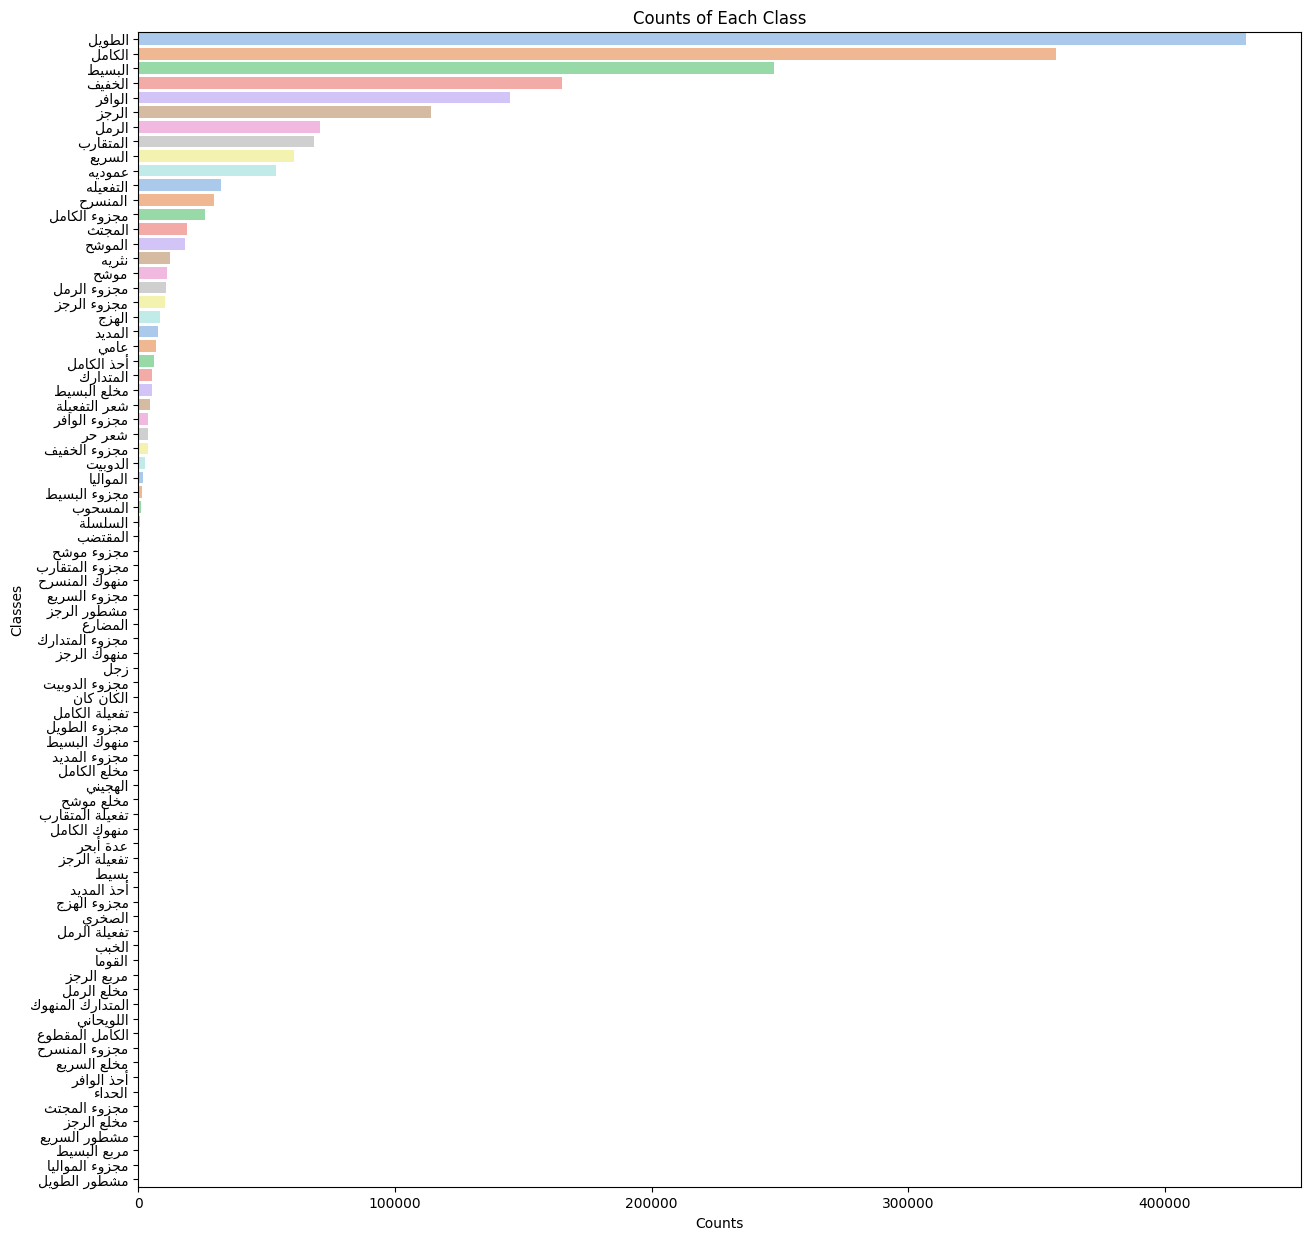

In [28]:
value_counts = df_ashaar['poem meter'].value_counts()

meters_reshaped = [reshape_text(m) for m in value_counts.index]
# Plot horizontal bar
plt.figure(figsize=(15, 15)) 
sns.barplot(y=meters_reshaped, x=value_counts.values, palette='pastel')
plt.title('Counts of Each Class')
plt.xlabel('Counts')
plt.ylabel('Classes')
plt.show()


Remove non-Khalili meters

In [29]:
khalil_meters = ['الطويل', 'المديد', 'البسيط', 'الكامل', 'الوافر', 'الهزج', 'الرجز', 'الرمل', 'السريع', 'المنسرح', 'المضارع', "الخفيف" ,'المقتضب', 'المجتث', 'المتقارب', 'الخبب']

In [30]:
pattern = '|'.join(khalil_meters)
df_filtered = df_ashaar[df_ashaar['poem meter'].str.contains(pattern, na=False)]


In [31]:
df_filtered.head()

,single verses,poem meter
0,أَصبَحَ المُلك لِلَّذي فَطر الخَل قَ بِتَقديرٍ...,الخفيف
1,غافر الذَنب للمسيءِ بِعَفوٍ قابل التَوب ذي الع...,الخفيف
2,مُرسل المُصطَفى البَشير إِلَينا رَحمة مِنهُ بِ...,الخفيف
3,رَبَنا رَبّنا إِلَيكَ أَنينا فَأَجرنا مِن حَر ...,الخفيف
4,وَاكفِنا شَرّ ما نَخاف بِلُطفٍ يا عَظيماً يَرج...,الخفيف


In [32]:
len(df_filtered['poem meter'].unique())

51

C:\Users\abdul\AppData\Local\Temp\ipykernel_4884\1616584284.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=meters_reshaped, x=value_counts.values, palette='pastel')


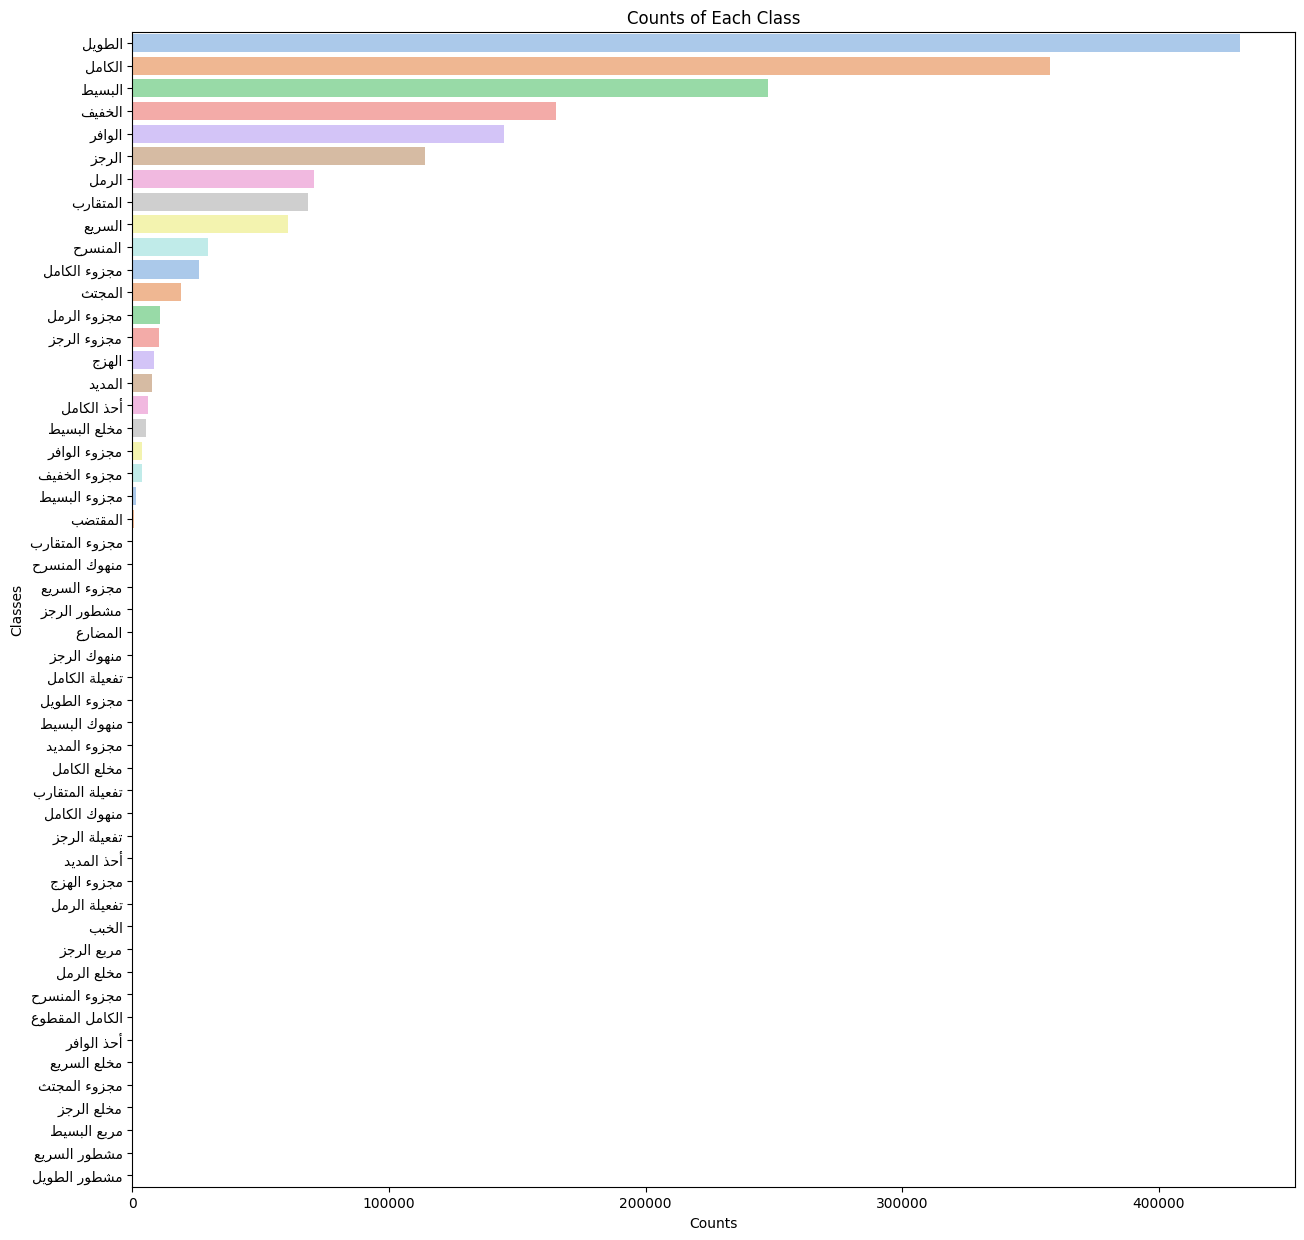

In [33]:
value_counts = df_filtered['poem meter'].value_counts()

meters_reshaped = [reshape_text(m) for m in value_counts.index]
# Plot horizontal bar
plt.figure(figsize=(15, 15)) 
sns.barplot(y=meters_reshaped, x=value_counts.values, palette='pastel')
plt.title('Counts of Each Class')
plt.xlabel('Counts')
plt.ylabel('Classes')
plt.show()


In [34]:
value_counts_filtered = df_filtered['poem meter'].value_counts()

for poem_meter, count in value_counts_filtered.items():
    print(f'{poem_meter}: {count}')


الطويل: 431496
الكامل: 357507
البسيط: 247583
الخفيف: 165140
الوافر: 144772
الرجز: 114111
الرمل: 70728
المتقارب: 68414
السريع: 60737
المنسرح: 29385
مجزوء الكامل: 26114
المجتث: 18811
مجزوء الرمل: 10637
مجزوء الرجز: 10322
الهزج: 8371
المديد: 7594
أحذ الكامل: 6024
مخلع البسيط: 5447
مجزوء الوافر: 3818
مجزوء الخفيف: 3568
مجزوء البسيط: 1261
المقتضب: 801
مجزوء المتقارب: 358
منهوك المنسرح: 258
مجزوء السريع: 196
مشطور الرجز: 185
المضارع: 157
منهوك الرجز: 121
تفعيلة الكامل: 58
مجزوء الطويل: 57
منهوك البسيط: 55
مجزوء المديد: 54
مخلع الكامل: 51
تفعيلة المتقارب: 29
منهوك الكامل: 27
تفعيلة الرجز: 23
أحذ المديد: 20
مجزوء الهزج: 18
تفعيلة الرمل: 16
الخبب: 14
مربع الرجز: 10
مخلع الرمل: 8
مجزوء المنسرح: 5
الكامل المقطوع: 5
أحذ الوافر: 4
مخلع السريع: 4
مجزوء المجتث: 3
مخلع الرجز: 2
مربع البسيط: 2
مشطور السريع: 2
مشطور الطويل: 1


Drop meters with < 100 rows

In [35]:
valid_values = value_counts[value_counts >= 100].index

df_filtered = df_filtered[df_filtered['poem meter'].isin(valid_values)]


In [36]:
len(df_filtered['poem meter'].unique())

28

C:\Users\abdul\AppData\Local\Temp\ipykernel_4884\3338087714.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=meters_reshaped, x=value_counts.values, palette='pastel')


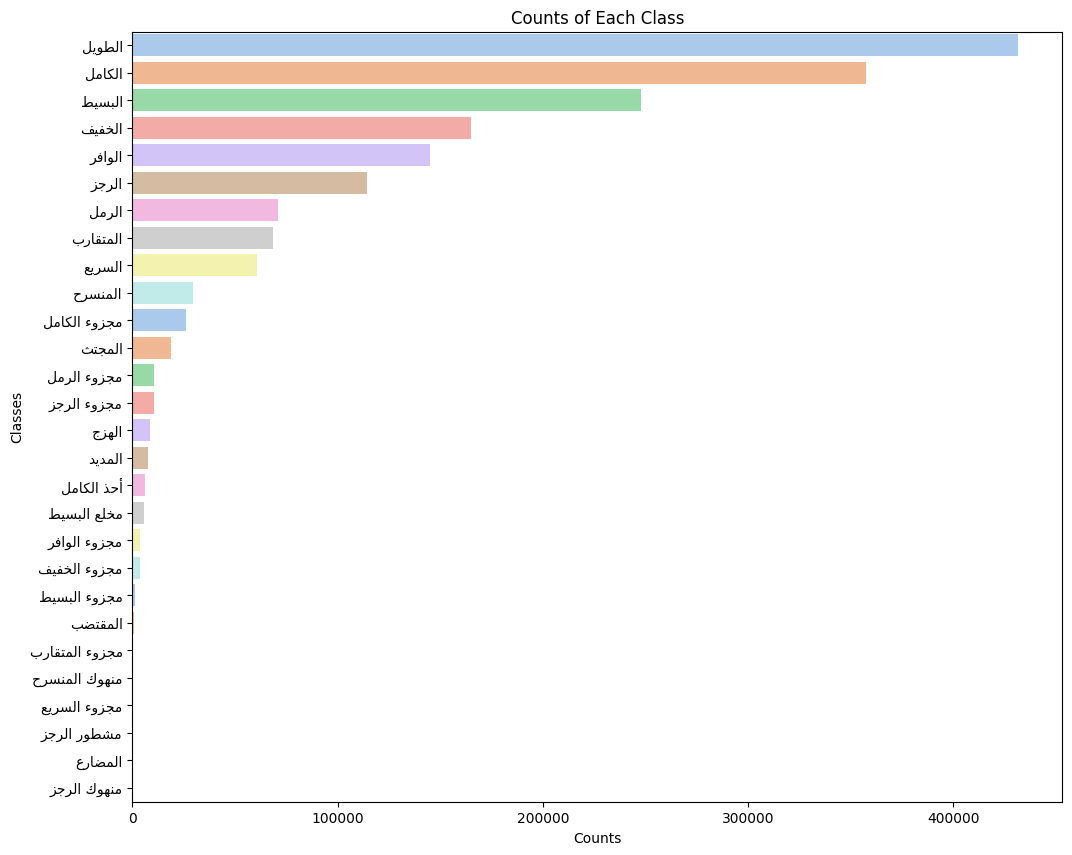

In [37]:
value_counts = df_filtered['poem meter'].value_counts()

meters_reshaped = [reshape_text(m) for m in value_counts.index]
# Plot horizontal bar
plt.figure(figsize=(12, 10)) 
sns.barplot(y=meters_reshaped, x=value_counts.values, palette='pastel')
plt.title('Counts of Each Class')
plt.xlabel('Counts')
plt.ylabel('Classes')
plt.show()


In [38]:
df_filtered.head()

,single verses,poem meter
0,أَصبَحَ المُلك لِلَّذي فَطر الخَل قَ بِتَقديرٍ...,الخفيف
1,غافر الذَنب للمسيءِ بِعَفوٍ قابل التَوب ذي الع...,الخفيف
2,مُرسل المُصطَفى البَشير إِلَينا رَحمة مِنهُ بِ...,الخفيف
3,رَبَنا رَبّنا إِلَيكَ أَنينا فَأَجرنا مِن حَر ...,الخفيف
4,وَاكفِنا شَرّ ما نَخاف بِلُطفٍ يا عَظيماً يَرج...,الخفيف


In [39]:
meters = list(df_filtered['poem meter'].unique())

In [ ]:
meters

** RUN ABOVE FOR df_filtered Class Test **

In [ ]:
samples = df_filtered[df_filtered['poem meter']== "الخفيف"].sample(2000, replace=False)


Balancing the data

In [ ]:
def remove_tashkeel(verse):
    return re.sub(r'[\u0617-\u061A\u064B-\u0652]', '', verse)  # Remove Tashkeel


def random_remove_tashkeel(verse):
    return ''.join(char for char in verse if random.choice([True, False]) or not re.match(r'[\u0617-\u061A\u064B-\u0652]', char))


In [ ]:
v = "هذا كلام دون تشكيل"
print(v)
print(remove_tashkeel(v))
print(random_remove_tashkeel(v))

In [ ]:
v = df_filtered.loc[1,'single verses']
print(v)
print(remove_tashkeel(v))
print(random_remove_tashkeel(v))

In [ ]:
target_count = 2000
balanced_samples = []

# Set target count
target_count = 2000
balanced_samples = []

for meter in df_filtered['poem meter'].unique():
    current_data = df_filtered[df_filtered['poem meter'] == meter]
    
    count = len(current_data)

    samples = []

    if count >= target_count:
        samples.append(current_data.sample(target_count, replace=False))
    
    else:
        repeat_count = target_count // count + 1
        
        samples.append(current_data)
        
        no_tashkeel = current_data.copy()
        no_tashkeel['single verses'] = no_tashkeel['single verses'].apply(remove_tashkeel)
        if target_count - len(samples[0]) <= len(no_tashkeel):
            print('In IF')
            samples.append(no_tashkeel[:(target_count - len(samples[0]))])
        else: 
            print('In ELSE')
            samples.append(no_tashkeel)
        
        remaining_needed = target_count - (len(samples[0]) + len(samples[1]))
        
        random_samples = []
        for _ in range(remaining_needed):
            random_verse = current_data.sample(1)
            random_tashkeel_removed_verse = random_remove_tashkeel(random_verse['single verses'].values[0])
            random_samples.append({'single verses': random_tashkeel_removed_verse, 'poem meter': meter})
        
        random_samples_df = pd.DataFrame(random_samples)
        samples.append(random_samples_df)

    balanced_samples.append(pd.concat(samples, ignore_index=True))

balanced_df = pd.concat(balanced_samples, ignore_index=True)

print(balanced_df)

In [ ]:
balanced_df['poem meter'].value_counts()

In [ ]:
balanced_df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)

In [ ]:
balanced_df.head(20)

Try to save a portion of it as JSON:

In [ ]:
json_data = [
    {"input": 
    f"ما هو البحر الشعري لهذا البيت؟ {row['single verses']}",
     "output": row['poem meter']}
    for _, row in balanced_df.iterrows()
]
json_data

In [ ]:
import json


json_data = [
    {"input": 
    f"ما هو البحر الشعري لهذا البيت؟ {row['single verses']}",
     "output": row['poem meter']}
    for _, row in balanced_df.iterrows()
]



with open('train.json', 'w', encoding='utf-8') as json_file:
    json.dump(json_data, json_file, ensure_ascii=False, indent=4)

print("JSON file created successfully.")


# Data For Generation

In [69]:
df_gen = ashaar['train'].to_pandas()

In [70]:
df_gen = df_gen[['poem verses','poem meter']]

In [71]:
df_gen.head()

,poem verses,poem meter
0,"[أَصبَحَ المُلك لِلَّذي فَطر الخَل, قَ بِتَقدي...",بحر الخفيف
1,"[مِن أَي مَولى اِرتَجي, وَلاي باب التَجي, وَال...",بحر مجزوء الرمل
2,"[العَبد عَبدك يا مَن أَنتَ سَيدهُ, وَلَيسَ غَي...",بحر البسيط
3,"[لَو كُنتَ أَطمَع بِالمَنام تَوهما, لَسالَت طَ...",بحر الكامل
4,"[يعد عَليَّ أَنفاسي ذُنوباً, إِذا ما قُلت أَفد...",بحر الوافر


In [72]:
pattern = '|'.join(khalil_meters)
df_gen = df_gen[df_gen['poem meter'].str.contains(pattern, na=False)]

In [73]:
df_gen['poem meter'] = df_gen['poem meter'].str.replace(r'بحر ', '', regex=True).str.strip()

In [74]:
df_gen['poem meter'].unique()

array(['الخفيف', 'مجزوء الرمل', 'البسيط', 'الكامل', 'الوافر', 'الطويل',
       'السريع', 'المنسرح', 'مجزوء الكامل', 'المجتث', 'الرمل',
       'مجزوء الوافر', 'المتقارب', 'مخلع البسيط', 'مجزوء الرجز',
       'مجزوء الخفيف', 'الرجز', 'المديد', 'الهزج', 'مجزوء البسيط',
       'مربع البسيط', 'منهوك المنسرح', 'تفعيلة المتقارب',
       'الكامل المقطوع', 'تفعيلة الرمل', 'تفعيلة الرجز', 'تفعيلة الكامل',
       'أحذ الكامل', 'مشطور الرجز', 'المضارع', 'المقتضب', 'مخلع الكامل',
       'مجزوء المتقارب', 'مجزوء السريع', 'الخبب', 'مجزوء المنسرح',
       'مجزوء المجتث', 'منهوك الرجز', 'مجزوء الطويل', 'مخلع الرجز',
       'أحذ الوافر', 'مخلع الرمل', 'منهوك البسيط', 'مجزوء المديد',
       'منهوك الكامل', 'مربع الرجز', 'مشطور السريع', 'مجزوء الهزج',
       'مخلع السريع', 'أحذ المديد', 'مشطور الطويل'], dtype=object)

In [75]:
df_gen = df_gen['poem verses']
df_gen.head()

0    [أَصبَحَ المُلك لِلَّذي فَطر الخَل, قَ بِتَقدي...
1    [مِن أَي مَولى اِرتَجي, وَلاي باب التَجي, وَال...
2    [العَبد عَبدك يا مَن أَنتَ سَيدهُ, وَلَيسَ غَي...
3    [لَو كُنتَ أَطمَع بِالمَنام تَوهما, لَسالَت طَ...
4    [يعد عَليَّ أَنفاسي ذُنوباً, إِذا ما قُلت أَفد...
Name: poem verses, dtype: object

In [76]:
df_gen.head(1)

0    [أَصبَحَ المُلك لِلَّذي فَطر الخَل, قَ بِتَقدي...
Name: poem verses, dtype: object

In [77]:
df_gen = pd.DataFrame(df_gen, columns=['poem verses'])

In [78]:
def split_poem(poem):

    first = ' '.join(poem[:2])
    
    rest = '\n'.join([' '.join(poem[i:i+2]) for i in range(2, len(poem), 2)])
    
    return pd.Series([first, rest])


df_gen[['first_two', 'others_joined']] = df_gen['poem verses'].apply(split_poem)

df_gen.head()

,poem verses,first_two,others_joined
0,"[أَصبَحَ المُلك لِلَّذي فَطر الخَل, قَ بِتَقدي...",أَصبَحَ المُلك لِلَّذي فَطر الخَل قَ بِتَقديرٍ...,غافر الذَنب للمسيءِ بِعَفوٍ قابل التَوب ذي الع...
1,"[مِن أَي مَولى اِرتَجي, وَلاي باب التَجي, وَال...",مِن أَي مَولى اِرتَجي وَلاي باب التَجي,وَاللَهُ حَيٌّ رازِقٌ يُعطي الجَزيل لمُرتَجي\n...
2,"[العَبد عَبدك يا مَن أَنتَ سَيدهُ, وَلَيسَ غَي...",العَبد عَبدك يا مَن أَنتَ سَيدهُ وَلَيسَ غَيرك...,أَنتَ الَّذي لِسَبيل الخَير تُرشِدُهُ مالي سَو...
3,"[لَو كُنتَ أَطمَع بِالمَنام تَوهما, لَسالَت طَ...",لَو كُنتَ أَطمَع بِالمَنام تَوهما لَسالَت طَيف...,حاشا صُدودك أَن تَذم فَإِنَّها تَحلو لَدَيَّ و...
4,"[يعد عَليَّ أَنفاسي ذُنوباً, إِذا ما قُلت أَفد...",يعد عَليَّ أَنفاسي ذُنوباً إِذا ما قُلت أَفديه...,وَأَبعد ما يَكون الود مِنهُ إِذا ما باتَ مِن أ...


In [79]:
df_gen.loc[0]

poem verses      [أَصبَحَ المُلك لِلَّذي فَطر الخَل, قَ بِتَقدي...
first_two        أَصبَحَ المُلك لِلَّذي فَطر الخَل قَ بِتَقديرٍ...
others_joined    غافر الذَنب للمسيءِ بِعَفوٍ قابل التَوب ذي الع...
Name: 0, dtype: object

In [80]:
with pd.option_context('display.max_colwidth', None):
    print(df_gen.iloc[1]) 


poem verses      [مِن أَي مَولى اِرتَجي, وَلاي باب التَجي, وَاللَهُ حَيٌّ رازِقٌ, يُعطي الجَزيل لمُرتَجي, رَب جَواد لَم يَزَل, مِن كُل ضيقٍ مَخرَجي, إِن رُحت أَرجوغَيرَهُ, خابَ الرواح مَع المَجي, يا عَيس آمالي أَقصدي, باب الكَريم وَعَرجي, وَضَعي رِحالك وَاِرتَعي, فَالأُم حَمل المُزعجِ, وَتَوسَلي بِمُحمدٍ, وَبِآلهِ كَي تَنتجي, الهاشمي المُصطَفى, صج الهُدى المُتَبَلِجِ, وَبِشَيبة الصَديق صا, حب كل فَضل أَبهَجِ, وَالسَيد الفاروق مِن, بِسِوى الهُدى لَم يَلهجِ, وَبصنوه عُثمان ذي الن, نورَين أَقوم مَنهَجِ, وَعَليٍّ الكرّار فا, تح كُل باب مُرتجِ, وَبَقية الصَحب الكِرا, م أَولي الثَنا المُتَأرجِ, هُم أَبحر الفَضل الَّذي, نَ بِغَيرِهُم لَم تُفرجِ, وَكَذا السَفينة إِن نَجَت, فَجَميع مَن فيها نَجي]
first_two                                                                                                                                                                                                                                                                                                      

In [81]:

json_data = [
    {"input": 
    f"اكتب أبياتًا بعد هذا البيت: {row['first_two']}",
     "output": row['others_joined']}
    for _, row in df_gen.sample(frac=0.25, random_state=42).iterrows() if "\n" in row['others_joined']
]


with open('train_gen50.json', 'w', encoding='utf-8') as json_file:
    json.dump(json_data, json_file, ensure_ascii=False, indent=4)

print("JSON file created successfully.")

JSON file created successfully.


# Test Preparation

## Classification

In [44]:
df_filtered['poem meter'].unique()

array(['الخفيف', 'مجزوء الرمل', 'البسيط', 'الكامل', 'الوافر', 'الطويل',
       'السريع', 'المنسرح', 'مجزوء الكامل', 'المجتث', 'الرمل',
       'مجزوء الوافر', 'المتقارب', 'مخلع البسيط', 'مجزوء الرجز',
       'مجزوء الخفيف', 'الرجز', 'المديد', 'الهزج', 'مجزوء البسيط',
       'منهوك المنسرح', 'أحذ الكامل', 'مشطور الرجز', 'المضارع', 'المقتضب',
       'مجزوء المتقارب', 'مجزوء السريع', 'منهوك الرجز'], dtype=object)

In [45]:
df_utrain = pd.read_json("USED_DATA/train.json")
df_utrain.head()


,input,output
0,ما هو البحر الشعري لهذا البيت؟ مَقصِدُها سُدَّ...,مجزوء السريع
1,ما هو البحر الشعري لهذا البيت؟ ينم باديه على ا...,مشطور الرجز
2,ما هو البحر الشعري لهذا البيت؟ مــــزَّقــــتْ...,المديد
3,ما هو البحر الشعري لهذا البيت؟ فــي طــيــه لل...,السريع
4,ما هو البحر الشعري لهذا البيت؟ وعــكــســه الث...,الرجز


In [46]:
df_filtered.head()

,single verses,poem meter
0,أَصبَحَ المُلك لِلَّذي فَطر الخَل قَ بِتَقديرٍ...,الخفيف
1,غافر الذَنب للمسيءِ بِعَفوٍ قابل التَوب ذي الع...,الخفيف
2,مُرسل المُصطَفى البَشير إِلَينا رَحمة مِنهُ بِ...,الخفيف
3,رَبَنا رَبّنا إِلَيكَ أَنينا فَأَجرنا مِن حَر ...,الخفيف
4,وَاكفِنا شَرّ ما نَخاف بِلُطفٍ يا عَظيماً يَرج...,الخفيف


In [47]:
least = []
for meter in df_filtered['poem meter'].unique():
    # Get the verses corresponding to the current meter
    current_data = df_filtered[df_filtered['poem meter'] == meter]
    if len(current_data) < 2000:
        if not meter in least:
            least.append(meter)

print(least)
print(len(least))

['مجزوء البسيط', 'منهوك المنسرح', 'مشطور الرجز', 'المضارع', 'المقتضب', 'مجزوء المتقارب', 'مجزوء السريع', 'منهوك الرجز']
8


In [48]:
df_filtered

,single verses,poem meter
0,أَصبَحَ المُلك لِلَّذي فَطر الخَل قَ بِتَقديرٍ...,الخفيف
1,غافر الذَنب للمسيءِ بِعَفوٍ قابل التَوب ذي الع...,الخفيف
2,مُرسل المُصطَفى البَشير إِلَينا رَحمة مِنهُ بِ...,الخفيف
3,رَبَنا رَبّنا إِلَيكَ أَنينا فَأَجرنا مِن حَر ...,الخفيف
4,وَاكفِنا شَرّ ما نَخاف بِلُطفٍ يا عَظيماً يَرج...,الخفيف
...,...,...
3869614,مقامه إذ تجلى وفي البيد إذ تحلى,المضارع
3869615,على بابك انتظرنا وفي البال ألف حيلة,المضارع
3869616,من الوصل لا تجرنا وعسرنا أن تزيله,المضارع
3869617,خذ الصفر لا تبالي فللصفر للرجال,المضارع


In [49]:
# duplicate_column = 'output'

# df_filtered = df_filtered.loc[:, ~df_filtered.columns.duplicated(keep='first')]

In [50]:
# df_filtered.head()

In [51]:
df_filtered = df_filtered.rename(columns={'single verses': 'input'})
df_filtered = df_filtered.rename(columns={'poem meter': 'output'})

In [52]:
df_filtered.head()

,input,output
0,أَصبَحَ المُلك لِلَّذي فَطر الخَل قَ بِتَقديرٍ...,الخفيف
1,غافر الذَنب للمسيءِ بِعَفوٍ قابل التَوب ذي الع...,الخفيف
2,مُرسل المُصطَفى البَشير إِلَينا رَحمة مِنهُ بِ...,الخفيف
3,رَبَنا رَبّنا إِلَيكَ أَنينا فَأَجرنا مِن حَر ...,الخفيف
4,وَاكفِنا شَرّ ما نَخاف بِلُطفٍ يا عَظيماً يَرج...,الخفيف


In [53]:
df_to_exclude = df_filtered.copy()

In [54]:
df_formatted = df_filtered.copy()

In [55]:
df_to_exclude['input']= "ما هو البحر الشعري لهذا البيت؟ " + df_to_exclude['input'].astype(str)

In [56]:
df_to_exclude.head()

,input,output
0,ما هو البحر الشعري لهذا البيت؟ أَصبَحَ المُلك ...,الخفيف
1,ما هو البحر الشعري لهذا البيت؟ غافر الذَنب للم...,الخفيف
2,ما هو البحر الشعري لهذا البيت؟ مُرسل المُصطَفى...,الخفيف
3,ما هو البحر الشعري لهذا البيت؟ رَبَنا رَبّنا إ...,الخفيف
4,ما هو البحر الشعري لهذا البيت؟ وَاكفِنا شَرّ م...,الخفيف


In [57]:
# df_filtered['input']= "ما هو البحر الشعري لهذا البيت؟ " + df_filtered['input'].astype(str)
df_formatted['input'] = df_formatted['input'].apply(lambda x: f"""
        "ما هو البحر الشعري لهذا البيت؟ "
        {str(x)}
        """)

In [58]:
df_formatted.head()

,input,output
0,"\n ""ما هو البحر الشعري لهذا البيت؟ ""\n ...",الخفيف
1,"\n ""ما هو البحر الشعري لهذا البيت؟ ""\n ...",الخفيف
2,"\n ""ما هو البحر الشعري لهذا البيت؟ ""\n ...",الخفيف
3,"\n ""ما هو البحر الشعري لهذا البيت؟ ""\n ...",الخفيف
4,"\n ""ما هو البحر الشعري لهذا البيت؟ ""\n ...",الخفيف


In [59]:
len("ما هو البحر الشعري لهذا البيت؟ " )

31

In [60]:
df_diff = df_to_exclude.merge(df_utrain, how='left', indicator=True)
df_diff = df_diff[df_diff['_merge']=='left_only']

print(len(df_to_exclude))
print(len(df_utrain))
print(len(df_diff))
print(len(df_to_exclude) - len(df_utrain))
print(len(df_to_exclude) - len(df_utrain) == len(df_utrain))


1793916
56000
1750409
1737916
False


In [61]:
df_both = df_to_exclude.merge(df_utrain, how='left', indicator=True)
df_both = df_both[df_both['_merge']=='both']
len(df_both)

46507

In [62]:
df_diff.head()

,input,output,_merge
0,ما هو البحر الشعري لهذا البيت؟ أَصبَحَ المُلك ...,الخفيف,left_only
1,ما هو البحر الشعري لهذا البيت؟ غافر الذَنب للم...,الخفيف,left_only
2,ما هو البحر الشعري لهذا البيت؟ مُرسل المُصطَفى...,الخفيف,left_only
3,ما هو البحر الشعري لهذا البيت؟ رَبَنا رَبّنا إ...,الخفيف,left_only
4,ما هو البحر الشعري لهذا البيت؟ وَاكفِنا شَرّ م...,الخفيف,left_only


In [63]:
df_diff['input'] = df_diff['input'].str.replace("ما هو البحر الشعري لهذا البيت؟ ", "", regex=False)

In [64]:
df_diff['input'] = df_diff['input'].apply(lambda x: f"""
        "ما هو البحر الشعري لهذا البيت؟ "
        {str(x)}
        """)

In [65]:
df_diff.head()

,input,output,_merge
0,"\n ""ما هو البحر الشعري لهذا البيت؟ ""\n ...",الخفيف,left_only
1,"\n ""ما هو البحر الشعري لهذا البيت؟ ""\n ...",الخفيف,left_only
2,"\n ""ما هو البحر الشعري لهذا البيت؟ ""\n ...",الخفيف,left_only
3,"\n ""ما هو البحر الشعري لهذا البيت؟ ""\n ...",الخفيف,left_only
4,"\n ""ما هو البحر الشعري لهذا البيت؟ ""\n ...",الخفيف,left_only


In [66]:
df_to_exclude.head()

,input,output
0,ما هو البحر الشعري لهذا البيت؟ أَصبَحَ المُلك ...,الخفيف
1,ما هو البحر الشعري لهذا البيت؟ غافر الذَنب للم...,الخفيف
2,ما هو البحر الشعري لهذا البيت؟ مُرسل المُصطَفى...,الخفيف
3,ما هو البحر الشعري لهذا البيت؟ رَبَنا رَبّنا إ...,الخفيف
4,ما هو البحر الشعري لهذا البيت؟ وَاكفِنا شَرّ م...,الخفيف


In [ ]:
df_diff2 = df_to_exclude.merge(df_utrain, how='left', indicator=True)
df_diff2 = df_diff2[df_diff2['_merge']=='left_only']

print(len(df_to_exclude))
print(len(df_utrain))
print(len(df_diff2))
print(len(df_to_exclude) - len(df_utrain))
print(len(df_to_exclude) - len(df_utrain) == len(df_utrain))


In [ ]:
json_data2 = [
    {"input": row['input'],
     "output": row['output']}
    for _, row in df_diff2.sample(200,random_state=42,replace= False).iterrows()
]
json_data2

In [ ]:
with open('test_cls_as_trained.json', 'w', encoding='utf-8') as json_file:
    json.dump(json_data2, json_file, ensure_ascii=False, indent=4)

print("JSON file created successfully.")

In [ ]:
json_data = [
    {"input": row['input'],
     "output": row['output']}
    for _, row in df_diff.sample(200,random_state=42,replace= False).iterrows()
]
json_data

In [ ]:
with open('test_cls_final.json', 'w', encoding='utf-8') as json_file:
    json.dump(json_data, json_file, ensure_ascii=False, indent=4)

print("JSON file created successfully.")

For the meters in least, they will be manipulated by Human factor, as they were fully used in the training part due to their scarcity in the dataset. 

In [ ]:
# to_be_written = []
# for m in least:
#     some = 
#     to_be_written.append() 

## Generation

In [67]:
df_utrain_gen = pd.read_json("USED_DATA/train_gen20.json")
df_utrain_gen.head()

,input,output
0,اكتب أبياتًا بعد هذا البيت: يَــقُــولون لي أَ...,وَلَم يَــكُــن الإِعــراضُ مِـنّـي تَـعَـمُّد...
1,اكتب أبياتًا بعد هذا البيت: إِنَّ الغَوانِيَ ق...,في صُدغِهِنَّ عَقارِبٌ يَلسَعنَنا ما مَن لَسَع...
2,اكتب أبياتًا بعد هذا البيت: دع لذة الدنيا فمن ...,لذتــهــا حــلم وأيــامــهــا لمح ولكن كم لها ...
3,اكتب أبياتًا بعد هذا البيت: كـــل نَـــوْحٍ لَ...,كَـــيْـــفَ وَالرُّزْءُ فِــي وَدُودٍ صَــفِـ...
4,اكتب أبياتًا بعد هذا البيت: جِسمِيَ لا جِسمُكَ...,حُمّاكَ حُمّايَ غَيرَ شَكٍّ فَلَيتَني دونَكَ ا...


In [68]:
df_gen.head()

NameError: name 'df_gen' is not defined

In [ ]:
df_gen = df_gen[['first_two','others_joined']]

In [ ]:
df_gen = df_gen.reset_index(drop = True)

In [ ]:
df_gen.head()

In [ ]:
df_gen = df_gen.rename(columns={'first_two': 'input'})
df_gen = df_gen.rename(columns={'others_joined': 'output'})

In [ ]:
df_gen['input'] = df_gen['input'].apply(lambda x: f"""
        أنت شاعر فصيح عليم بقواعد العروض والقافية، تكتب الشعر ملتزما بها.
        اكتب أبياتًا بعد هذا البيت، ملتزما بالبحر والقافية باحتراف:
        {str(x)}
        """)

In [ ]:
type(df_gen['input'])

In [ ]:
df_gen.head()

In [ ]:
df_diff_gen = df_gen.merge(df_utrain_gen, how='left', indicator=True)
df_diff_gen = df_diff_gen[df_diff_gen['_merge']=='left_only']

print(len(df_gen))
print(len(df_utrain_gen))
print(len(df_diff_gen))
print(len(df_gen) - len(df_utrain_gen))
print(len(df_gen) - len(df_diff_gen) == len(df_utrain_gen))

In [ ]:
df_test_gen = df_diff_gen.sample(200, replace=False).reset_index(drop=True)

In [ ]:
df_test_gen = df_test_gen[['input','output']]

In [ ]:
df_test_gen.head()

In [ ]:
df_test_gen.head()

In [ ]:
df_gen.head()

In [ ]:
import json

In [ ]:
df_gen__cond = df_gen[df_gen['output'].str.contains('\n', na=False)]
print(df_gen__cond.head())
df_gen__cond_sampled = df_gen__cond.sample(200, random_state=42).iterrows()

json_data = [
    {"input": f"{row['input']}",
     "output": row['output']}
    for _, row in df_gen__cond_sampled
]

with open('test_gen.json', 'w', encoding='utf-8') as json_file:
    json.dump(json_data, json_file, ensure_ascii=False, indent=4)

print("JSON file created successfully.")